 # Around Simpson's Paradox

## About the problem:

In 1972-1974, in Whickham, a town in the north-east of England, located approximately 6.5 kilometres south-west of Newcastle upon Tyne, a survey of one-sixth of the electorate was conducted in order to inform work on thyroid and heart disease (Tunbridge and al. 1977). A continuation of this study was carried out twenty years later. (Vanderpump et al. 1995). Some of the results were related to smoking and whether individuals were still alive at the time of the second study. For the purpose of simplicity, we will restrict the data to women and among these to the 1314 that were categorized as "smoking currently" or "never smoked". There were relatively few women in the initial survey who smoked but have since quit (162) and very few for which information was not available (18). Survival at 20 years was determined for all women of the first survey.

All these data are available in this file CSV. You will find on each line if the person smokes or not, whether alive or dead at the time of the second study, and his age at the time of the first survey.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

data = pd.read_csv("Subject6_smoking.csv")
print(data)

     Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
...     ...    ...   ...
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]


1. Tabulate the total number of women alive and dead over the period according to their smoking habits. Calculate in each group (smoking/non-smoking) the mortality rate (the ratio of the number of women who died in a group to the total number of women in that group). You can graph these data and calculate confidence intervals if you wish. Why is this result surprising?

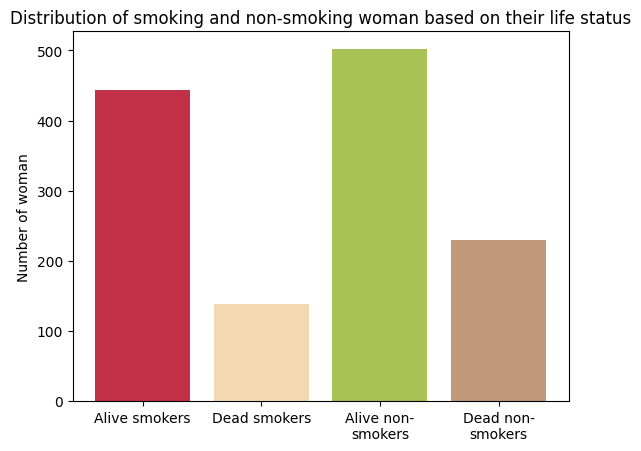

In [2]:
smoker_alive = len(data[(data['Smoker'] == 'Yes') & (data['Status'] == 'Alive')])
smoker_dead = len(data[(data['Smoker'] == 'Yes') & (data['Status'] == 'Dead')])
non_smoker_alive = len(data[(data['Smoker'] == 'No') & (data['Status'] == 'Alive')])
non_smoker_dead = len(data[(data['Smoker'] == 'No') & (data['Status'] == 'Dead')])

categories = ['Alive smokers', 'Dead smokers', 'Alive non-smokers', 'Dead non-smokers']
counts = [smoker_alive, smoker_dead, non_smoker_alive, non_smoker_dead]

plt.bar(categories, counts, color=['#C33149', '#F3D9B1', '#A8C256', '#C29979'])
plt.ylabel('Number of woman')
plt.title('Distribution of smoking and non-smoking woman based on their life status')

wrapped_labels = [textwrap.fill(label, width=15) for label in categories]

plt.xticks(range(len(categories)), wrapped_labels, ha='center', va='top')
plt.show()

In [3]:
smoking_rate = smoker_dead/(smoker_dead+smoker_alive)
print("Mortality rate of smokers is: " + str(smoking_rate))

non_smoking_rate = non_smoker_dead/(non_smoker_dead+non_smoker_alive)
print("Mortality rate of non-smokers is : " + str(non_smoking_rate))

Mortality rate of smokers is: 0.23883161512027493
Mortality rate of non-smokers is : 0.31420765027322406


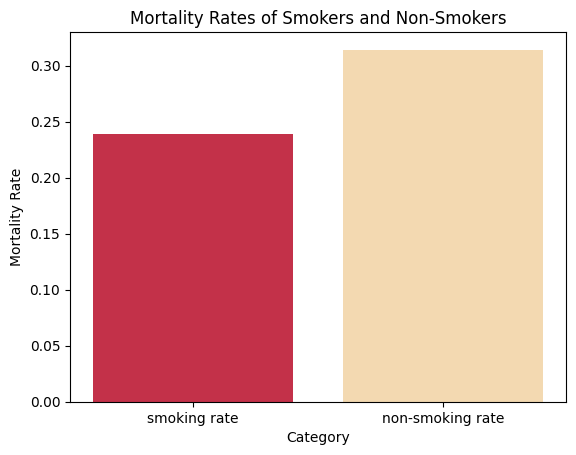

In [4]:
plt.bar(["smoking rate","non-smoking rate"], [smoking_rate,non_smoking_rate], color=['#C33149', '#F3D9B1'])
plt.xlabel('Category')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rates of Smokers and Non-Smokers')

plt.show()

What is surprising is that we expected the mortality rate to be higher in women from the category of smokers, however, women from the category of no smokers have higher mortality rate.

Although surprising, this may not be the real picture. Many other factors can affect these results, such as age. Perhaps we should look at the number of years of death in both categories and thus determine whether smoking affects lifespan.

Also, the dataset is small, only 1314 respondents, and we cannot be sure that it is enough to make any conclusions.

2. Go back to question 1 (numbers and mortality rates) and add a new category related to the age group. For example, the following classes will be considered: 18-34 years, 34-54 years, 55-64 years, over 65 years.

    Why is this result surprising? Can you explain this paradox? Similarly, you may wish to provide a graphical representation of the data to support     your explanations.

In [5]:
data_age_group = data.copy()
bins = [18, 34, 54, 65, float('inf')] 

labels = ['18-34 years', '35-54 years', '55-64 years', 'over 65 years']

data_age_group['Age Group'] = pd.cut(data_age_group['Age'], bins=bins, labels=labels, right=False)

print(data_age_group)

     Smoker Status   Age      Age Group
0       Yes  Alive  21.0    18-34 years
1       Yes  Alive  19.3    18-34 years
2        No   Dead  57.5    55-64 years
3        No  Alive  47.1    35-54 years
4       Yes  Alive  81.4  over 65 years
...     ...    ...   ...            ...
1309    Yes  Alive  35.9    35-54 years
1310     No  Alive  22.3    18-34 years
1311    Yes   Dead  62.1    55-64 years
1312     No   Dead  88.6  over 65 years
1313     No  Alive  39.1    35-54 years

[1314 rows x 4 columns]


In [6]:
result_df = data_age_group.groupby(['Age Group', 'Smoker'], observed=False).agg(
    Total=('Status', 'count'),
    Dead=('Status', lambda x: (x == 'Dead').sum()),
    Alive=('Status', lambda x: (x == 'Alive').sum())
)

result_df['Mortality Rate'] = result_df['Dead'] / result_df['Total']

print(result_df)

                      Total  Dead  Alive  Mortality Rate
Age Group     Smoker                                    
18-34 years   No        219     6    213        0.027397
              Yes       179     5    174        0.027933
35-54 years   No        199    19    180        0.095477
              Yes       239    41    198        0.171548
55-64 years   No        121    40     81        0.330579
              Yes       115    51     64        0.443478
over 65 years No        193   165     28        0.854922
              Yes        49    42      7        0.857143


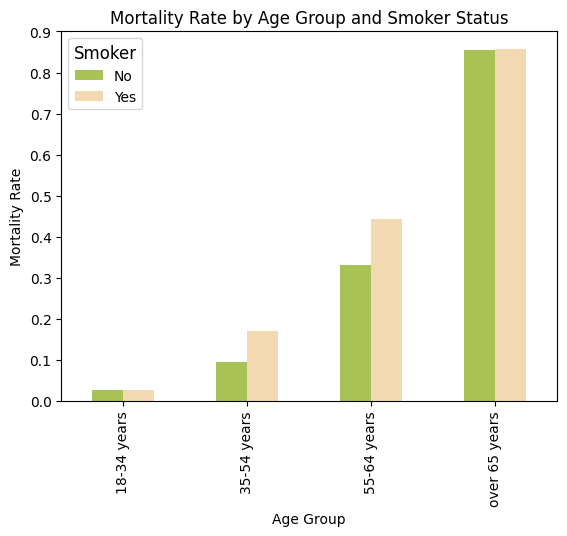

In [7]:
result_df.reset_index().pivot(index='Age Group', columns='Smoker', values='Mortality Rate').plot(kind='bar', color=['#A8C256', '#F3D9B1'])

plt.title('Mortality Rate by Age Group and Smoker Status')
plt.xlabel('Age Group')
plt.ylabel('Mortality Rate')
plt.legend(title='Smoker', title_fontsize='12')

plt.show()

Here we can see, according to Around Simpson's Paradox, that when we group data by age group we obtain different results. This is not suprising at all, these results were expected in the first place. 

For the oldest group of woman, we can observe that mortality rate for both non-smokers and smokers is the same meaning that older people in general have a higher higher death rate, because of other disases and age. For younger woman, it's also not a surprising result because these are people who have just started smoking so we don't expect smoking to have that much of an effect on mortality in this category. However, in the middle ages, as we expected, we can see the impact of smoking on mortality.

3. In order to avoid a bias induced by arbitrary and non-regular age groupings, it is possible to try to perform a logistic regression. If we introduce a Death variable of 1 or 0 to indicate whether the individual died during the 20-year period, we can study the Death ~ Age model to study the probability of death as a function of age according to whether one considers the group of smokers or non-smokers. Do these regressions allow you to conclude or not on the harmfulness of smoking? You will be able to propose a graphical representation of these regressions (without omitting the regions of confidence).